# Setting Environment

In [ ]:
!pip install python-dotenv -q

In [ ]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from dotenv import load_dotenv
load_dotenv("creds.env")
project_path = os.getenv("PROJECT_PATH")

os.chdir(project_path)

In [ ]:
# Importing all necessary libraries
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

# Libraries for string operations
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag, FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from collections import Counter

# Libraries for Image operations
from skimage.feature import local_binary_pattern
from skimage.color import rgb2gray
from skimage import feature, io, color

In [ ]:
# Downloading essential things of NLTK
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Loading Data

In [ ]:
# Function to read Caption file
def load_captions(captions_file):
    # Loading the captions into a DataFrame
    return pd.read_csv(captions_file, delimiter=',')

In [ ]:
# Function to Load data
def load_dataset(image_dir, captions_df):

    # Dictionary to store the images and captions
    dataset = {}

    # Looping through the DataFrame and load images
    for index, row in tqdm(captions_df.iterrows()):
        image_path = os.path.join(image_dir, row['image'])
        try:
            image = Image.open(image_path)
            # Store the image and caption in the dictionary
            dataset[row['image']] = {'image': image, 'caption': row['caption']}
        except IOError:
            print(f"Error opening {image_path}")

    return dataset

In [ ]:
image_dir = 'data/Images'
captions_file = 'data/captions.txt'

# Loading captions
captions_df = load_captions(captions_file).sample(5000)

# Loading the dataset
dataset = load_dataset(image_dir, captions_df)
print("Dataset loaded successfully.")

5000it [46:13,  1.80it/s]

Dataset loaded successfully.


# Data Exploration

In [ ]:
# Display basic information about the dataset
print("Basic Information:")
print(captions_df.info())

# Display the first few rows of the dataset
print("\nFirst few captions:")
captions_df.head()

Basic Information:
<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 10293 to 21475
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   image    5000 non-null   object
 1   caption  5000 non-null   object
dtypes: object(2)
memory usage: 117.2+ KB
None

First few captions:


,image,caption
10293,2485467050_1d5e2696d4.jpg,Four young kids have a picture taken of them w...
24620,3291255271_a185eba408.jpg,A boy leans on a baseball bat and holds out on...
31525,3565598162_56044bc2f7.jpg,The girls dance to the street musicians
23050,3227499174_07feb26337.jpg,A bride and groom stand in front of a church d...
14671,2785108434_cd4a1c949c.jpg,A child jumping in the air on the beach .


In [ ]:
# Create a single string with all captions
all_captions = ' '.join(captions_df['caption'].tolist()).lower()

# Calculate the total number of words in the captions
words = all_captions.split()
print(f"\nTotal number of words in captions: {len(words)}")


Total number of words in captions: 59029


In [ ]:
# Calculate the number of unique words
unique_words = set(words)
print(f"Number of unique words: {len(unique_words)}")

# Most common words
word_counts = Counter(words)
most_common = word_counts.most_common(10)
print("\nMost common words:")
print(most_common)

Number of unique words: 3476

Most common words:
[('a', 7805), ('.', 4516), ('in', 2347), ('the', 2305), ('on', 1335), ('is', 1150), ('and', 1115), ('dog', 983), ('with', 974), ('man', 967)]


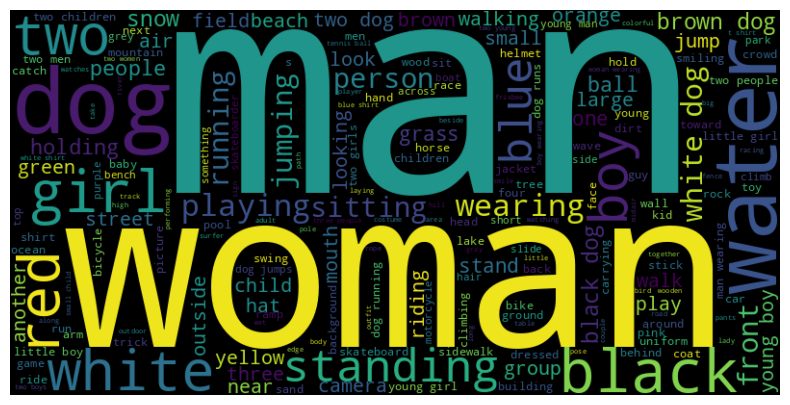

In [ ]:
# Generate a Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_captions)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

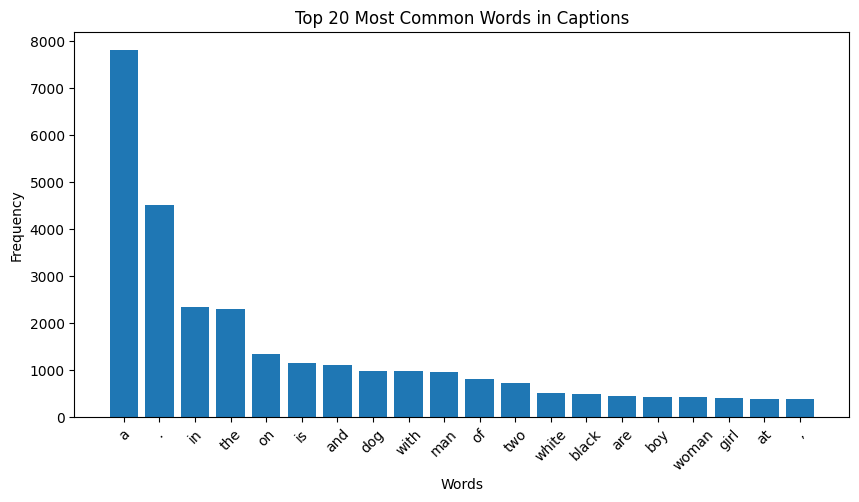

In [ ]:
# Plot the frequency of the most common words
top_words = word_counts.most_common(20)
plt.figure(figsize=(10, 5))
plt.bar(*zip(*top_words))
plt.xticks(rotation=45)
plt.title('Top 20 Most Common Words in Captions')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# NLTK Stop words
stop_words = set(stopwords.words('english'))
# Add any additional stopwords or symbols to filter
stop_words.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}', '...'])

# Split into words and filter out stopwords and punctuation
words = [word for word in all_captions.split() if word not in stop_words and word not in string.punctuation]

# Calculate the total number of words in the filtered captions
print(f"\nTotal number of words in filtered captions: {len(words)}")

# Calculate the number of unique words
unique_words = set(words)
print(f"Number of unique words: {len(unique_words)}")

# Most common words
word_counts = Counter(words)
most_common = word_counts.most_common(20)
print("\nMost common words after filtering stopwords and symbols:")
print(most_common)


Total number of words in filtered captions: 31125
Number of unique words: 3372

Most common words after filtering stopwords and symbols:
[('dog', 983), ('man', 967), ('two', 717), ('white', 499), ('black', 485), ('boy', 429), ('woman', 420), ('girl', 404), ('wearing', 365), ('people', 354), ('young', 328), ('red', 324), ('water', 320), ('brown', 298), ('running', 261), ('standing', 253), ('blue', 253), ('playing', 246), ('dogs', 246), ('shirt', 223)]


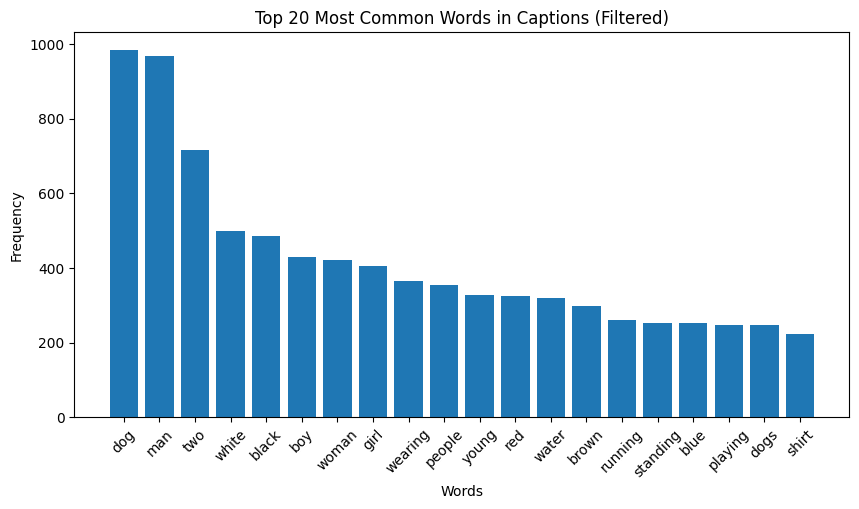

In [ ]:
# Plot the frequency of the most common words
plt.figure(figsize=(10, 5))
plt.bar(*zip(*most_common))
plt.xticks(rotation=45)
plt.title('Top 20 Most Common Words in Captions (Filtered)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


Frequency of Parts of Speech:


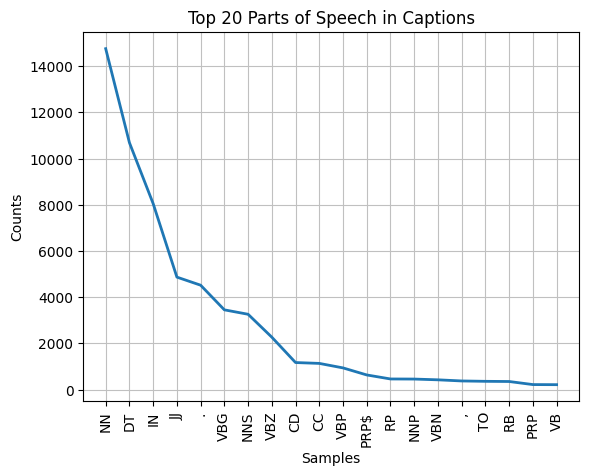

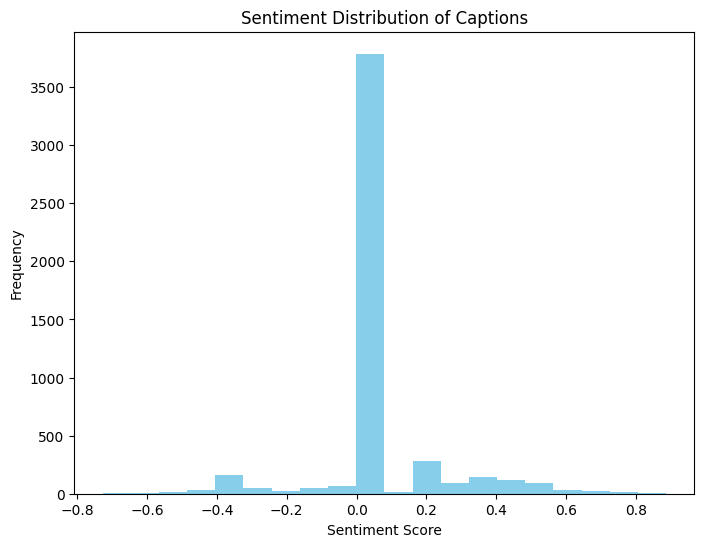

Average Sentiment Score: 0.03


In [ ]:
def explore_advanced_features(captions_df):

    sid = SentimentIntensityAnalyzer()

    # Adding advanced linguistic analysis to the DataFrame
    captions_df['tokens'] = captions_df['caption'].apply(word_tokenize)
    captions_df['pos_tags'] = captions_df['tokens'].apply(pos_tag)

    # Extracting nouns, adjectives, and verbs
    captions_df['nouns'] = captions_df['pos_tags'].apply(lambda tags: [word for word, tag in tags if tag.startswith('NN')])
    captions_df['adjectives'] = captions_df['pos_tags'].apply(lambda tags: [word for word, tag in tags if tag.startswith('JJ')])
    captions_df['verbs'] = captions_df['pos_tags'].apply(lambda tags: [word for word, tag in tags if tag.startswith('VB')])

    # Analyzing sentiment
    captions_df['sentiment_scores'] = captions_df['caption'].apply(lambda x: sid.polarity_scores(x)['compound'])

    # Frequency distribution of parts of speech
    pos_counts = FreqDist(tag for wordlist in captions_df['pos_tags'] for _, tag in wordlist)
    print("\nFrequency of Parts of Speech:")
    pos_counts.plot(20, title="Top 20 Parts of Speech in Captions")

    # Plotting sentiment distribution
    plt.figure(figsize=(8, 6))
    plt.hist(captions_df['sentiment_scores'], bins=20, color='skyblue')
    plt.title('Sentiment Distribution of Captions')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.show()

    # Average sentiment score
    avg_sentiment = captions_df['sentiment_scores'].mean()
    print(f"Average Sentiment Score: {avg_sentiment:.2f}")

explore_advanced_features(captions_df)

Image: 2485467050_1d5e2696d4.jpg
Caption: Four kids are jumping around and playing outside .


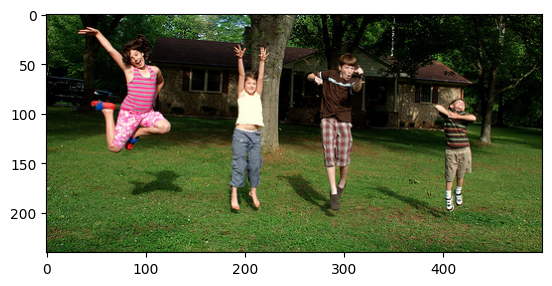

In [ ]:
# Displaying an example
image_name = list(dataset.keys())[0]
image = dataset[image_name]['image']
caption = dataset[image_name]['caption']

# Display the image and caption
print("Image:", image_name)
print("Caption:", caption)
plt.imshow(image)
plt.show()

Average Image Width: 457.22 pixels
Average Image Height: 397.21 pixels


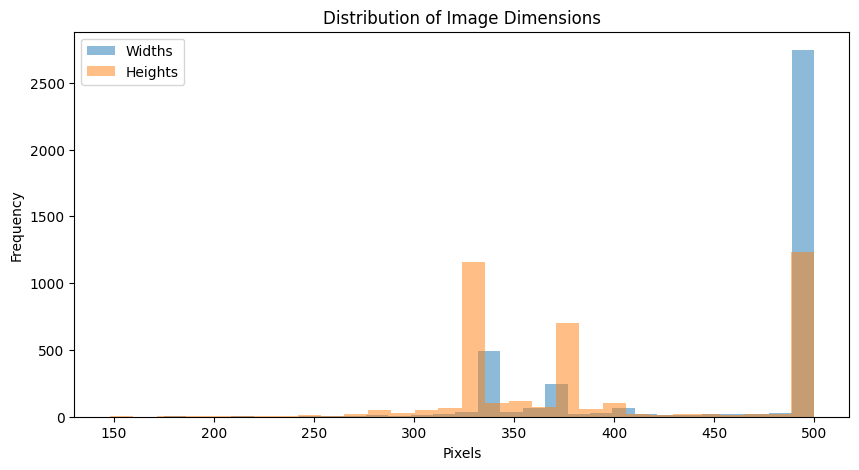

In [ ]:
def analyze_images(dataset):
    # Analyzing image dimensions
    widths, heights = [], []
    for info in dataset.values():
        img = info['image']
        widths.append(img.width)
        heights.append(img.height)

    # Displaying average dimensions
    print(f"Average Image Width: {np.mean(widths):.2f} pixels")
    print(f"Average Image Height: {np.mean(heights):.2f} pixels")

    # Plotting the distribution of image dimensions
    plt.figure(figsize=(10, 5))
    plt.hist(widths, bins=30, alpha=0.5, label='Widths')
    plt.hist(heights, bins=30, alpha=0.5, label='Heights')
    plt.title('Distribution of Image Dimensions')
    plt.xlabel('Pixels')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

analyze_images(dataset)

# Data Preparation

## Text Preprocessing

In [ ]:
import re
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Function to clean the captions
def clean_caption(caption):
    caption = caption.lower()
    caption = re.sub(r"[^a-zA-Z0-9]+", ' ', caption)
    caption = 'startseq ' + caption + ' endseq'
    return caption

# Clean all captions in the dataset
for key in dataset:
    dataset[key]['caption'] = clean_caption(dataset[key]['caption'])

In [ ]:
# Tokenize the captions
captions = [dataset[key]['caption'] for key in dataset]
tokenizer = Tokenizer()
tokenizer.fit_on_texts(captions)
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary size:", vocab_size)

# Convert captions to sequences of tokens and pad them
max_length = max(len(tokenizer.texts_to_sequences([caption])[0]) for caption in captions)
print("Maximum caption length:", max_length)

for key in dataset:
    sequence = tokenizer.texts_to_sequences([dataset[key]['caption']])[0]
    dataset[key]['sequence'] = pad_sequences([sequence], maxlen=max_length, padding='post')[0]

## Image Preprocessing

In [ ]:
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
import numpy as np
from PIL import Image
from tqdm import tqdm

# Load the VGG16 model pre-trained on ImageNet
vgg_model = VGG16(weights='imagenet')
feature_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.layers[-2].output)

# Function to preprocess images
def preprocess_image(image):
    # Resize the image
    image = image.resize((224, 224))

    # Convert the image to array
    image = img_to_array(image)

    # Expand dimensions to match the input shape of the model
    image = np.expand_dims(image, axis=0)

    # Preprocess the image
    image = preprocess_input(image)
    return image

In [ ]:
# Prepare a batch of images
batch_size = 64
image_keys = list(dataset.keys())
num_batches = len(image_keys) // batch_size + (1 if len(image_keys) % batch_size != 0 else 0)

# Iterate through batches
for i in tqdm(range(num_batches)):
    batch_keys = image_keys[i * batch_size:(i + 1) * batch_size]
    batch_images = np.vstack([preprocess_image(dataset[key]['image']) for key in batch_keys])

    # Extract features for the batch
    batch_features = feature_extractor.predict(batch_images, verbose=0)

    # Assign the features back to the dataset
    for j, key in enumerate(batch_keys):
        dataset[key]['features'] = batch_features[j]

print("Feature extraction completed.")

# Modeling
## Model Training

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense, Embedding, LSTM, Dropout, add
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the CNN feature extractor model
image_input = Input(shape=(4096,))
image_features = Dropout(0.6)(image_input)
image_features = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(image_features)

# Define the sequence model
sequence_input = Input(shape=(max_length,))
sequence_features = Embedding(vocab_size, 256, mask_zero=True)(sequence_input)
sequence_features = Dropout(0.6)(sequence_features)
sequence_features = LSTM(256, kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01))(sequence_features)

# Combine the CNN and LSTM models
decoder = add([image_features, sequence_features])
decoder = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(decoder)
outputs = Dense(vocab_size, activation='softmax')(decoder)

# Define the final model
model = Model(inputs=[image_input, sequence_input], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

model.summary()